In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [2]:
kaggle_features=pd.read_csv("../data/kaggle_features/kaggle_features1.csv")
kaggle_features.head()

/Users/sushmithareddyboddireddy/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,27,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,2

,id,author,title,text,label,average_token_length,avg_negative_polarity,avg_positive_polarity,global_rate_negative_words,global_rate_positive_words,...,Unnamed: 678,Unnamed: 679,Unnamed: 680,Unnamed: 681,Unnamed: 682,Unnamed: 683,Unnamed: 684,Unnamed: 685,Unnamed: 686,Unnamed: 687
0,0,Darrell Lucus,House Dem Aide: We Didnâ€™t Even See Comeyâ€™s...,House Dem Aide: We Didnâ€™t Even See Comeyâ€™s...,1,8.289037098,-0.409313725,0.291411565,0.02004717,0.024764151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Daniel J. Flynn,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0,8.106514516,-0.23974359,0.365758046,0.018387553,0.032531825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Consortiumnews.com,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1,8.728426092,-0.27397343,0.32398374,0.018039216,0.032156863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Jessica Purkiss,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1,7.864804003,-0.172681704,0.348611111,0.033807829,0.021352313,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Howard Portnoy,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1,6.626717749,-0.05,0,0.006535948,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
kaggle_features=pd.DataFrame(kaggle_features)
kaggle_features.head()

,id,author,title,text,label,average_token_length,avg_negative_polarity,avg_positive_polarity,global_rate_negative_words,global_rate_positive_words,...,Unnamed: 678,Unnamed: 679,Unnamed: 680,Unnamed: 681,Unnamed: 682,Unnamed: 683,Unnamed: 684,Unnamed: 685,Unnamed: 686,Unnamed: 687
0,0,Darrell Lucus,House Dem Aide: We Didnâ€™t Even See Comeyâ€™s...,House Dem Aide: We Didnâ€™t Even See Comeyâ€™s...,1,8.289037098,-0.409313725,0.291411565,0.02004717,0.024764151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Daniel J. Flynn,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0,8.106514516,-0.23974359,0.365758046,0.018387553,0.032531825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Consortiumnews.com,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1,8.728426092,-0.27397343,0.32398374,0.018039216,0.032156863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Jessica Purkiss,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1,7.864804003,-0.172681704,0.348611111,0.033807829,0.021352313,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Howard Portnoy,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1,6.626717749,-0.05,0,0.006535948,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## K-Means clustering

In [4]:
kaggle_features_cluster=kaggle_features.loc[:,['author','average_token_length','avg_negative_polarity','avg_positive_polarity','global_rate_negative_words','global_rate_positive_words']]
kaggle_features_cluster1=kaggle_features.loc[:,['author','average_token_length','avg_negative_polarity','avg_positive_polarity','global_rate_negative_words','global_rate_positive_words']]

In [5]:
kaggle_features_cluster.head()

,author,average_token_length,avg_negative_polarity,avg_positive_polarity,global_rate_negative_words,global_rate_positive_words
0,Darrell Lucus,8.289037098,-0.409313725,0.291411565,0.02004717,0.024764151
1,Daniel J. Flynn,8.106514516,-0.23974359,0.365758046,0.018387553,0.032531825
2,Consortiumnews.com,8.728426092,-0.27397343,0.32398374,0.018039216,0.032156863
3,Jessica Purkiss,7.864804003,-0.172681704,0.348611111,0.033807829,0.021352313
4,Howard Portnoy,6.626717749,-0.05,0,0.006535948,0


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
kaggle_features_cluster['author']=encoder.fit_transform(kaggle_features_cluster['author'].astype('str'))
kaggle_features_cluster['average_token_length']=encoder.fit_transform(kaggle_features_cluster['average_token_length'].astype('str'))
kaggle_features_cluster['avg_negative_polarity']=encoder.fit_transform(kaggle_features_cluster['avg_negative_polarity'].astype('str'))
kaggle_features_cluster['avg_positive_polarity']=encoder.fit_transform(kaggle_features_cluster['avg_positive_polarity'].astype('str'))
kaggle_features_cluster['global_rate_negative_words']=encoder.fit_transform(kaggle_features_cluster['global_rate_negative_words'].astype('str'))
kaggle_features_cluster['global_rate_positive_words']=encoder.fit_transform(kaggle_features_cluster['global_rate_positive_words'].astype('str'))
kaggle_features_cluster.head()

,author,average_token_length,avg_negative_polarity,avg_positive_polarity,global_rate_negative_words,global_rate_positive_words
0,3443,5737,10464,3675,5563,2982
1,3411,5129,4081,10213,4882,5340
2,3329,7635,5878,6118,4733,5223
3,4283,4459,1830,8520,8779,2167
4,4004,2550,1201,910,1158,578


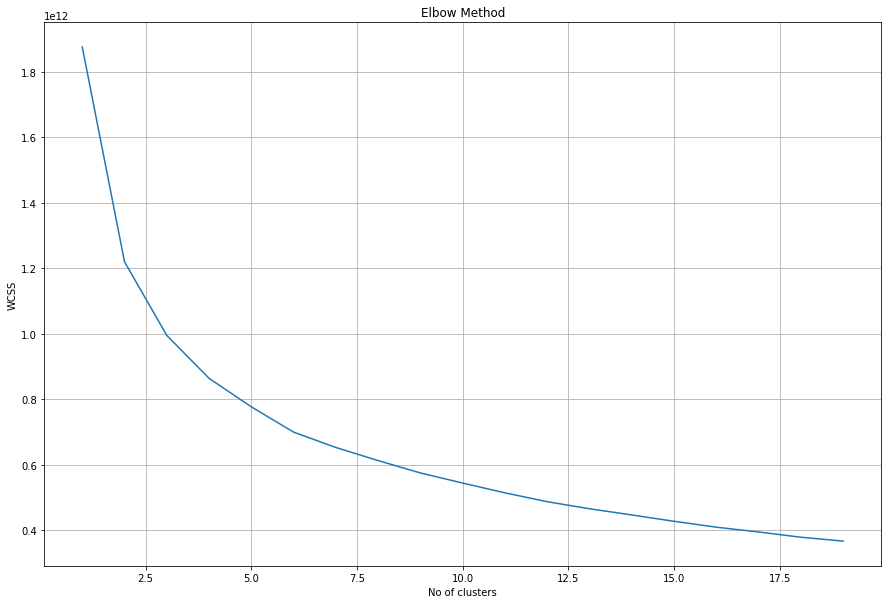

In [7]:
K = kaggle_features_cluster
K = K.iloc[:,[0,1,2, 3 ,4,5]].values
from sklearn.cluster import KMeans
wcss =[]
for j in range (1,20):
    kmeans = KMeans(n_clusters = j, init = 'k-means++', max_iter =100, n_init = 10, random_state = 0)
    kmeans.fit(K)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,10))
plt.plot(range(1,20),wcss)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [8]:
kmeans = KMeans(n_clusters= 5, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 0)
Kmeans = kmeans.fit_predict(K)
kaggle_features_cluster["Kmean_Clusters"] = Kmeans

In [9]:
cluster1 = cluster2 = cluster0 = cluster3 = cluster4 = 0

for row in kaggle_features_cluster["Kmean_Clusters"]:
    if row == 1:
        cluster1 = cluster1 + 1
    elif row == 2:
        cluster2 = cluster2 + 1
    elif row == 3:
        cluster3 = cluster3 + 1
    elif row == 4:
        cluster4 = cluster4 + 1
    else:
        cluster0 = cluster0 + 1
print(cluster3)
Cluster = [cluster3, cluster0, cluster4, cluster2, cluster1]

4606


In [10]:
kaggle_features_cluster.head()

,author,average_token_length,avg_negative_polarity,avg_positive_polarity,global_rate_negative_words,global_rate_positive_words,Kmean_Clusters
0,3443,5737,10464,3675,5563,2982,3
1,3411,5129,4081,10213,4882,5340,4
2,3329,7635,5878,6118,4733,5223,1
3,4283,4459,1830,8520,8779,2167,4
4,4004,2550,1201,910,1158,578,1


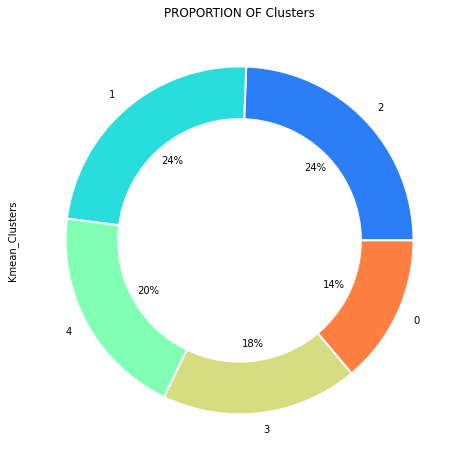

In [11]:
plt.figure(figsize=(8,8))
kaggle_features_cluster["Kmean_Clusters"].value_counts().plot.pie(autopct = "%1.0f%%",
                                             colors =sns.color_palette("rainbow",5),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.title("PROPORTION OF Clusters")
plt.show()

In [12]:
kaggle_features_cluster.groupby(['Kmean_Clusters'])['author'].count()

Kmean_Clusters
0    3490
1    5954
2    6146
3    4606
4    5004
Name: author, dtype: int64

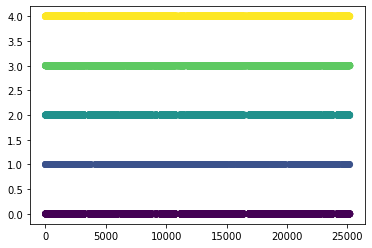

In [13]:
kmeans = KMeans(n_clusters=5)
clusteredData = kmeans.fit_predict(kaggle_features_cluster)
plt.plot(figsize = (600,600))
plt.scatter(kaggle_features_cluster.index,clusteredData, c= clusteredData, alpha=0.8) 
plt.show()

In [14]:

print((kaggle_features_cluster.iloc[list(np.where(clusteredData==0))[0],:]))
print((kaggle_features_cluster.iloc[list(np.where(clusteredData==1))[0],:]))
print((kaggle_features_cluster.iloc[list(np.where(clusteredData==2))[0],:]))
print((kaggle_features_cluster.iloc[list(np.where(clusteredData==3))[0],:]))

       author  average_token_length  avg_negative_polarity  \
5        3417                  2734                   9652   
8        6602                  7950                   6697   
12       2735                  4185                  11279   
13       4189                  3137                   6269   
24       5081                  7493                   8679   
...       ...                   ...                    ...   
25186    6602                  2494                   8611   
25188    4329                  5687                   8563   
25193    5806                  4360                   9853   
25194    4745                  4003                   7153   
25196    3000                  6364                   6776   

       avg_positive_polarity  global_rate_negative_words  \
5                      15405                        3072   
8                      14404                        1862   
12                      9770                        9216   
13             

## DBScan clustering

In [15]:
kaggle_features_cluster.head()

,author,average_token_length,avg_negative_polarity,avg_positive_polarity,global_rate_negative_words,global_rate_positive_words,Kmean_Clusters
0,3443,5737,10464,3675,5563,2982,3
1,3411,5129,4081,10213,4882,5340,4
2,3329,7635,5878,6118,4733,5223,1
3,4283,4459,1830,8520,8779,2167,4
4,4004,2550,1201,910,1158,578,1


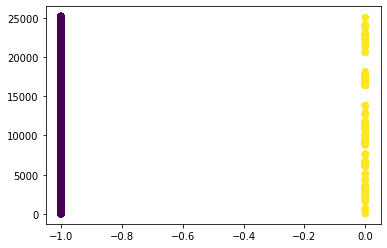

In [16]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=3, min_samples=1000)
clustering.fit(kaggle_features_cluster)

clusteredData2 = clustering.fit_predict(kaggle_features_cluster)
plt.scatter(clusteredData2,kaggle_features_cluster.index, c= clusteredData2)


In [17]:
#kaggle_features_cluster['Clusters']=clusteredData #Kmeans cluster
kaggle_features_cluster['DBScanCluster']=clusteredData2 #DBSCAN cluster
kaggle_features_cluster

,author,average_token_length,avg_negative_polarity,avg_positive_polarity,global_rate_negative_words,global_rate_positive_words,Kmean_Clusters,DBScanCluster
0,3443,5737,10464,3675,5563,2982,3,-1
1,3411,5129,4081,10213,4882,5340,4,-1
2,3329,7635,5878,6118,4733,5223,1,-1
3,4283,4459,1830,8520,8779,2167,4,-1
4,4004,2550,1201,910,1158,578,1,-1
...,...,...,...,...,...,...,...,...
25195,4269,3258,5248,14583,3911,1369,4,-1
25196,3000,6364,6776,10748,6086,3020,2,-1
25197,5126,5595,4391,4474,2353,6452,1,-1
25198,2642,3287,1375,6101,8165,789,1,-1


In [18]:
kaggle_features_cluster.groupby(['DBScanCluster'])['author'].count()

DBScanCluster
-1    23506
 0     1694
Name: author, dtype: int64